In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import bisect



import numpy as np
import scipy.constants as pc
import pandas as pd

import matplotlib.pyplot as plt


import opticslib as ol
import loadconfig as lc

In [53]:
loaded_elements = lc.load_run_args_from_file('telescope_00.yml')

telescope_bl = ol.BeamLine()

for name,props in loaded_elements.items():
    print(name)
    print(props)

    telescope_bl.add_element( ol.BLElement(name, eleprops=props['eleprops']) )



# make beam
rng = np.random.default_rng(seed=7)
STD_POS = 0.71E-3
STD_ANG = 5e-6

NMACRO = 1000
invec01 = np.stack((rng.normal(0.0, STD_POS, NMACRO),
                    rng.normal(0.0, STD_ANG, NMACRO)))
INPOS = -0.010
# OUTPOS = np.array([10.0])
outpos01 = np.arange(0.0,1.0,0.01)

outpos01, outvec01, outvec_mean, outvec_rms = telescope_bl.ray_trace(invec01, INPOS, outpos01)


print(f'size_in = {1e3*outvec_rms[0,0]:0.3f} mm')
print(f'size_out = {1e3*outvec_rms[-1,0]:0.3f} mm')
print(f'magnification factor = {outvec_rms[-1,0]/outvec_rms[0,0]:0.3f}')

# ls = dict(linewidth=1,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.31)
# ls['color'] = 'dodgerblue'

# xvec = outpos01
# for i in range(invec01.shape[1]):
#     yvec = outvec01[:,0,i]
    
#     plt.plot(xvec, yvec,**ls)

# # plt.axis([outpos01.min(), outpos01.max(), -200e-6, 200e-6])
# plt.grid(True)


 Successfully loaded run parameters from file:
telescope_00.yml
lens_01
{'eleprops': {'eletype': 'lens', 'position': 0.0, 'focal_len': 0.035}}
lens_02
{'eleprops': {'eletype': 'lens', 'position': 0.335, 'focal_len': 0.3}}
lens_03
{'eleprops': {'eletype': 'lens', 'position': 0.35, 'focal_len': 0.035}}
lens_04
{'eleprops': {'eletype': 'lens', 'position': 0.585, 'focal_len': 0.2}}
size_in = 0.668 mm
size_out = 32.735 mm
magnification factor = 48.979


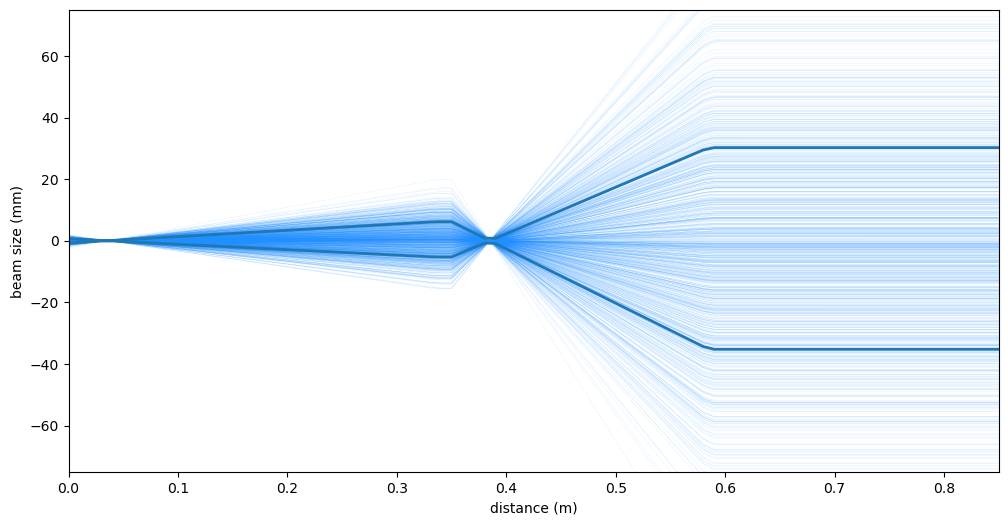

In [54]:
ls = dict(linewidth=0.1,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.41)
ls['color'] = 'dodgerblue'
fig,ax = plt.subplots(figsize=[12,6])
xvec = outpos01
yscale = 1e3
for i in range(0,invec01.shape[1],1):
    yvec = yscale * outvec01[:,0,i]
    
    ax.plot(xvec, yvec,**ls)

ls = dict(linewidth=2,linestyle='-',marker='o',ms=0, mfc='None', color='tab:blue', alpha=1)
ax.plot(xvec, yscale*(outvec_mean[:,0] + outvec_rms[:,0]), **ls)
ax.plot(xvec, yscale*(outvec_mean[:,0] - outvec_rms[:,0]), **ls)

# ax.set_xlim([-0.01, 1.0])
ax.set_xlim([0.0, 0.850])
ax.set_ylim([-75, 75])

ax.set_xlabel('distance (m)')
ax.set_ylabel('beam size (mm)')
ax.grid(False)
plt.show()

In [28]:
2*np.cos(np.deg2rad(30))

1.7320508075688774

In [29]:
20/0.7

28.571428571428573

In [50]:
fig.savefig('beam_expand_2_00.png', dpi=200, bbox_inches='tight')

In [51]:
1000/35

28.571428571428573

In [55]:
(300/35)*(200/35)

48.97959183673469

In [56]:
(300/35)*0.7

5.999999999999999